In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, neighbors 

/Users/lokotochek/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Некоторые куски кода (например, функция для поверхностей) взяты с семинаров - надеюсь, это не возбраняется

# task 1

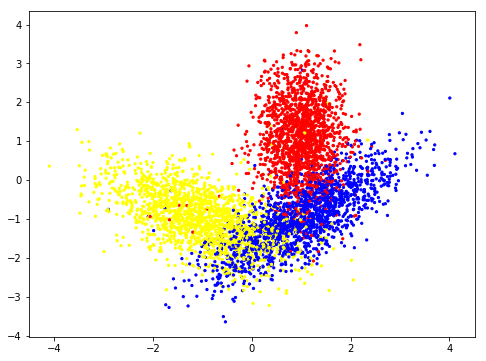

In [25]:
classification_problem = datasets.make_classification(n_samples=5000, 
                                                      n_features=2, 
                                                      n_informative=2,
                                                      n_redundant=0,
                                                      n_classes=3, 
                                                      n_clusters_per_class=1)


colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

plt.figure(figsize=(8,6))

plt.scatter([x[0] for x in classification_problem[0]], 
            [x[1] for x in classification_problem[0]], 
            c=classification_problem[1], 
            cmap=colors, 
            s=5)

In [44]:
train_data, test_data, \
train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                              classification_problem[1], 
                                                              test_size=0.3)

In [27]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
def get_meshgrid(data, 
                 step=.05, 
                 border=.5):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [31]:
def plot_decision_surface(estimator, 
                          train_data, 
                          train_labels, 
                          test_data, 
                          test_labels, 
                          colors=colors, 
                          light_colors=light_colors):
    estimator.fit(train_data, train_labels)
    
    plt.figure(figsize = (16, 6))
    
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), 
                                                        yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], 
                train_data[:, 1], 
                c=train_labels, 
                s=5, 
                cmap=colors)
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, 
                                                                          estimator.predict(train_data))))
    
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], 
                test_data[:, 1], 
                c=test_labels, 
                s=5, 
                cmap=colors)
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, 
                                                                         estimator.predict(test_data))))
    

n_neighbors: 1


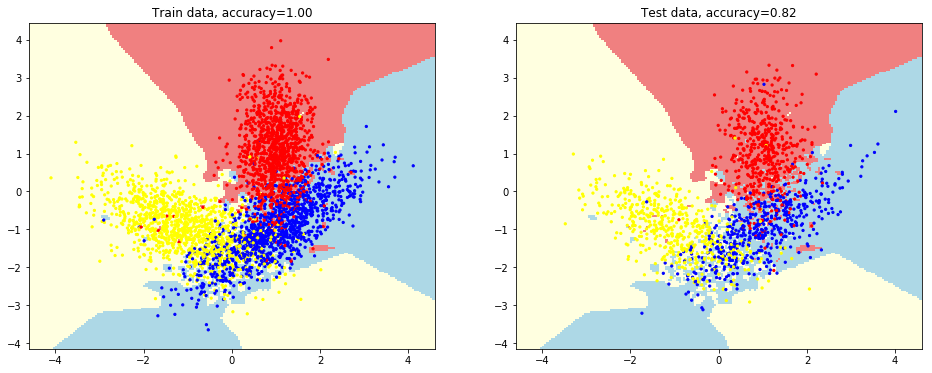

n_neighbors: 5


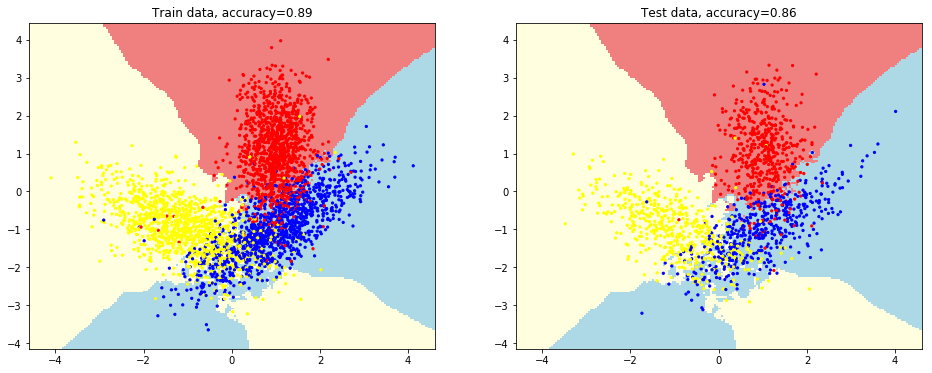

n_neighbors: 20


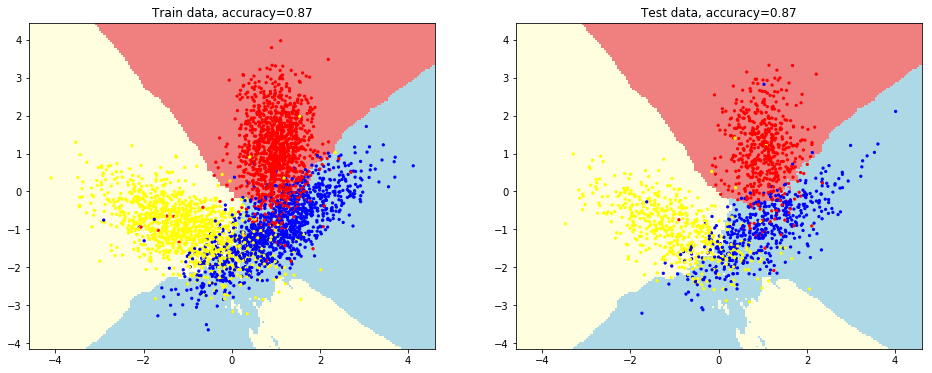

n_neighbors: 50


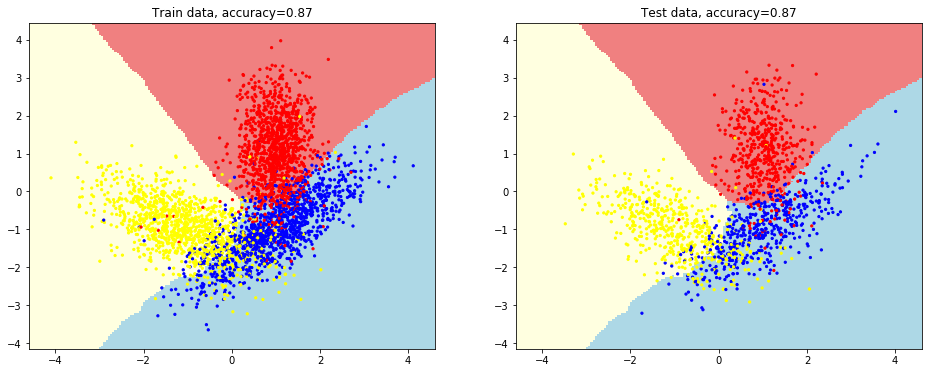

n_neighbors: 100


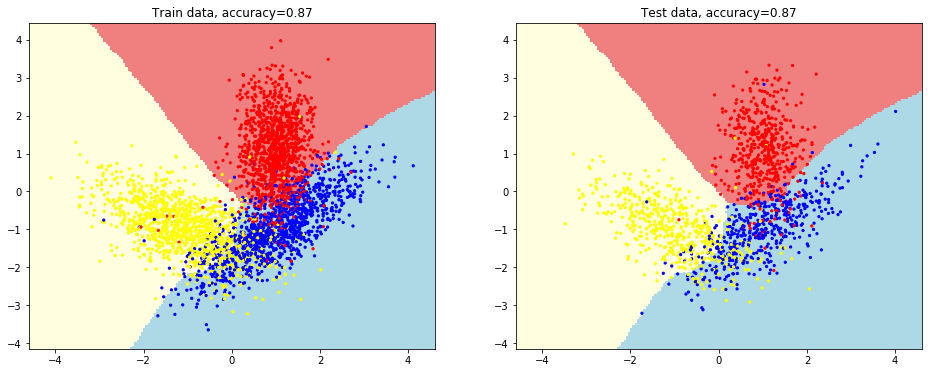

In [32]:
for n_neighbors in [1,5,20,50,100]:
    print('n_neighbors: {}'.format(n_neighbors))
    estimator = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)
    plt.show()

In [42]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

accuracies = []
MAX_K = 200
for k_neigh in list(range(1, MAX_K)): 

    this_accuracies = []

    for train, test in kf.split(range(len(classification_problem[0]))):
        train_data, train_labels = classification_problem[0][train], classification_problem[1][train]
        test_data, test_labels = classification_problem[0][test], classification_problem[1][test]

        estimator = neighbors.KNeighborsClassifier(n_neighbors=k_neigh)
        estimator.fit(train_data, train_labels)

        accuracy = metrics.accuracy_score(test_labels, estimator.predict(test_data))
        this_accuracies.append(accuracy)

    accuracies.append((k_neigh, np.mean(this_accuracies)))

best k:112.0, accuracy:0.8688


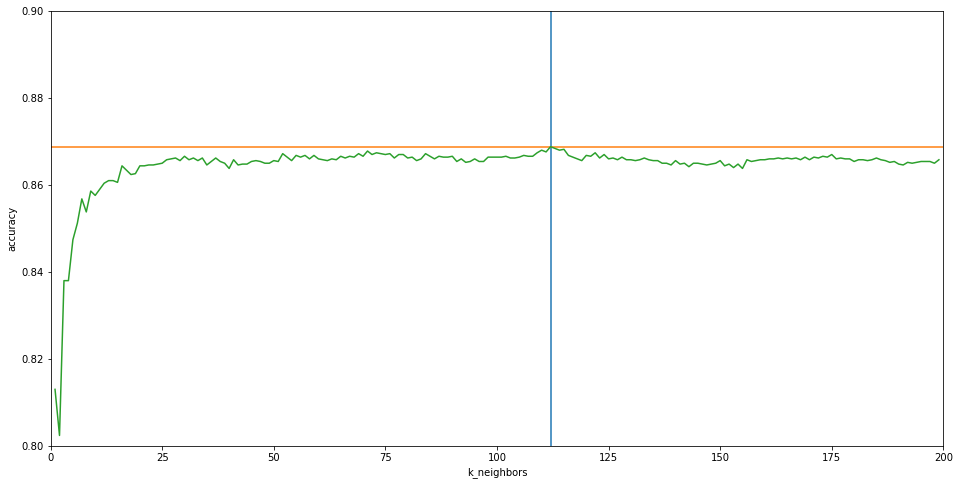

In [43]:
accuracies = np.array(accuracies)
best_k, best_accuracy = accuracies[accuracies[:,1].argmax()]
print('best k:{}, accuracy:{}'.format(best_k, best_accuracy))
plt.figure(figsize=(16,8))
plt.plot([best_k, best_k], [0, 1.0])
plt.plot([0, MAX_K], [best_accuracy, best_accuracy])
plt.plot(accuracies[:,0], accuracies[:,1])
plt.ylim((0.8,0.9))
plt.xlim((0,MAX_K))
plt.xlabel('k_neighbors')
plt.ylabel('accuracy')

# task 2


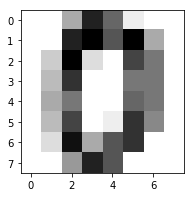

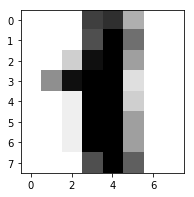

In [53]:
from sklearn import datasets

digits = datasets.load_digits()

plt.figure(0, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [72]:
breast_cancer = datasets.load_breast_cancer()
print('feature name:', breast_cancer.feature_names[1])
breast_cancer.data[:,1][:5]

feature name: mean texture


array([ 10.38,  17.77,  21.25,  20.38,  14.34])

In [137]:
def measure_naive_model(model, dataset):
    scores = cross_val_score(model(), 
                             dataset.data, 
                             dataset.target, 
                             cv=5)
    print('On dataset {} \n\tmodel {} \n\t\tscore: {}'.format(dataset.DESCR.split('\n')[0], 
                                                                  model.__name__, 
                                                                  scores.mean()))
    print()

In [138]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.model_selection import cross_val_score

for dataset in [digits, breast_cancer]:
    for model in [BernoulliNB, MultinomialNB, GaussianNB]:
        measure_naive_model(model, dataset)

On dataset Optical Recognition of Handwritten Digits Data Set 
	model BernoulliNB 
		score: 0.8247710459804785

On dataset Optical Recognition of Handwritten Digits Data Set 
	model MultinomialNB 
		score: 0.8714703025475334

On dataset Optical Recognition of Handwritten Digits Data Set 
	model GaussianNB 
		score: 0.8065207555552298

On dataset Breast Cancer Wisconsin (Diagnostic) Database 
	model BernoulliNB 
		score: 0.6274259330511736

On dataset Breast Cancer Wisconsin (Diagnostic) Database 
	model MultinomialNB 
		score: 0.8963755290496345

On dataset Breast Cancer Wisconsin (Diagnostic) Database 
	model GaussianNB 
		score: 0.9403770681031165



# Multinomial is the best by accuracy (never was the last)


### 1. Макс на breast cancer: 0.9403770681031165
### 2. Макс на digits: 0.8714703025475334
### 3. c, d

# task 3

(0, 7.0)

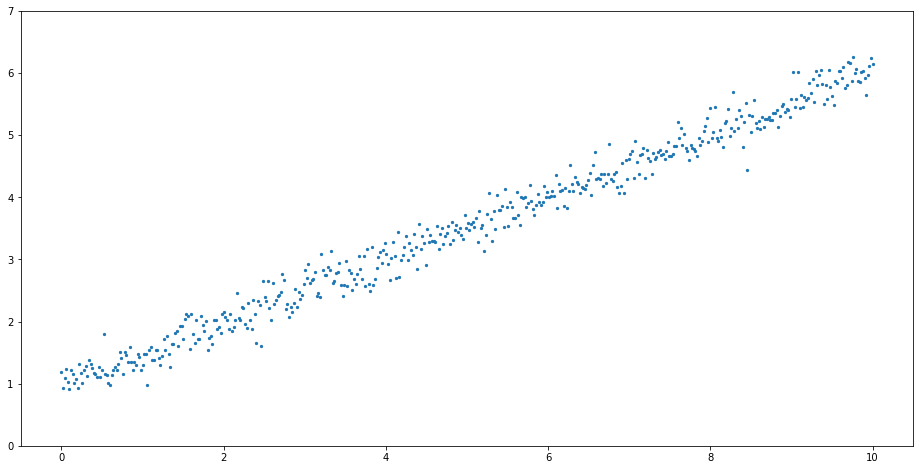

In [192]:
from scipy.stats import norm
EPS = norm(0., 0.2).rvs(size=500)
X = np.linspace(0., 10., 500)
Y = 0.5*X + 1. + EPS

plt.figure(figsize=(16, 8))
plt.scatter(X, Y, s=5)
plt.ylim((0,7.))

In [193]:
from scipy.optimize import minimize

In [197]:
# function (MSE) to be minimized:

def mse(coeffs, X, Y):
    k,b = coeffs
    # y = kx + b
    # we have (x_real, y_real)
    mse_error = 0
    for x_real, y_real in zip(X, Y):
        mse_error += ((k*x_real + b) - y_real)**2.
    return mse_error

result = minimize(lambda coeffs: mse(coeffs, X, Y), x0=[1.,1.])
result

      fun: 18.58993976955382
 hess_inv: array([[  9.19858148e-05,  -4.74717685e-04],
       [ -4.74717685e-04,   3.71868404e-03]])
      jac: array([  2.61545181e-04,   3.74317169e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 283
      nit: 3
     njev: 68
   status: 2
  success: False
        x: array([ 0.50642728,  0.97599673])

(0, 7.0)

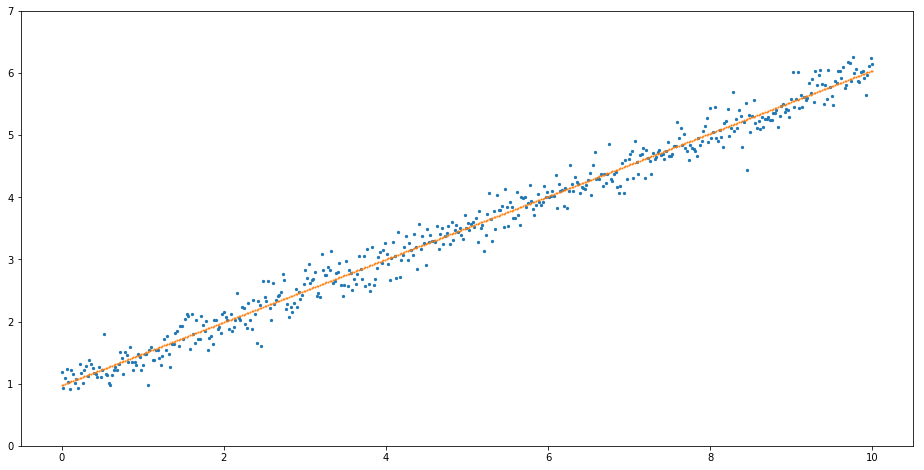

In [198]:
best_k, best_b = result.x


plt.figure(figsize=(16, 8))
plt.scatter(X, Y, s=5)
plt.scatter(np.linspace(0, 10, 500), best_k*np.linspace(0, 10, 500)+best_b, s=1)
plt.ylim((0,7.))

In [199]:
X = np.append(X, np.linspace(0., 10., 75))
EPS = norm(0., 0.2).rvs(size=75)
Y = np.append(Y, EPS - 1.)
# y = -1 + eps

In [200]:
Y.shape, X.shape

((575,), (575,))

MSE:       fun: 1537.0874246887042
 hess_inv: array([[  5.67574772e-05,  -2.27162207e-04],
       [ -2.27162207e-04,   1.54422390e-03]])
      jac: array([  3.05175781e-05,  -1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 215
      nit: 6
     njev: 51
   status: 2
  success: False
        x: array([ 0.43738424,  0.72423984])
MAE:       fun: 416.32991855630263
 hess_inv: array([[  9.32807218e-06,  -7.31246699e-06],
       [ -7.31246699e-06,   5.83357888e-06]])
      jac: array([-1.51301575, -1.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 500
      nit: 18
     njev: 123
   status: 2
  success: False
        x: array([ 0.50547095,  0.94136499])


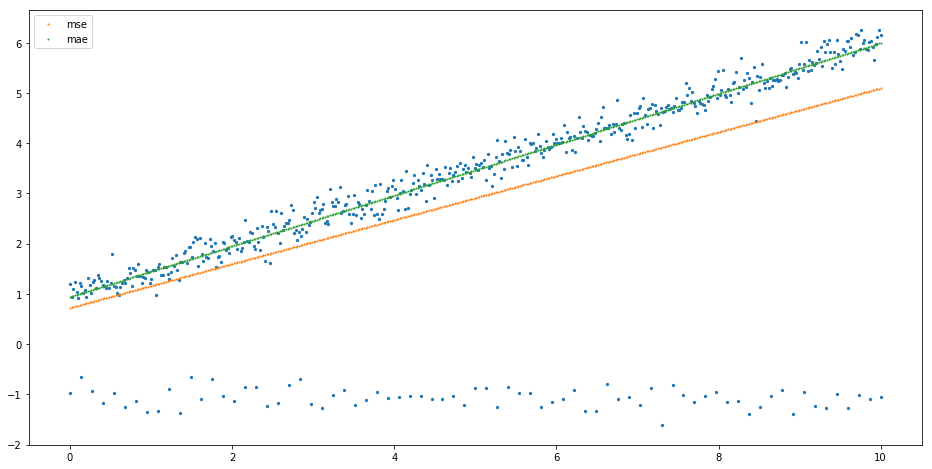

In [207]:
result = minimize(lambda coeffs: mse(coeffs, X, Y), x0=[1.,1.])
print('MSE:', result)

best_k, best_b = result.x

plt.figure(figsize=(16, 8))
plt.scatter(X, Y, s=5)
plt.scatter(np.linspace(0, 10, 500), best_k*np.linspace(0, 10, 500)+best_b, s=1, label='mse')

def mae(coeffs, X, Y):
    k,b = coeffs
    # y = kx + b
    # we have (x_real, y_real)
    mse_error = 0
    for x_real, y_real in zip(X, Y):
        mse_error += np.abs((k*x_real + b) - y_real)
    return mse_error

result = minimize(lambda coeffs: mae(coeffs, X, Y), x0=[1.,1.])

print('MAE:', result)

best_k, best_b = result.x

plt.scatter(np.linspace(0, 10, 500), best_k*np.linspace(0, 10, 500)+best_b, s=1, label='mae')

plt.legend()


# При минимизации mse больше внимания стал уделять свободному члену, а не коэффициенту
# логично, т.к. добавили много не зависящих от икса и не растущих с ним (в среднем меньших)

# MAE в этом отношении более стабилен, тк не так сильно штрафует за большое отклонение от шумных точек (которые последние 75) и ему не очень охота прогибаться под шум

# => Оптимизация MAE более робастна
# => Оптимизация MSE позволит быстрее сойтись (штрафы больше)